#### Part A: Basic EDA (Exploratory Data Analysis)

In [20]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
#Load the dataset into a Pandas DataFrame and display the first 5 rows

df = pd.read_csv('HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
#check the shape of the dataset (rows, columns)

df.shape

(311, 36)

In [4]:
#Display the column names and their data types.
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [5]:
#Find the number of unique values in each column.

df.nunique()

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [6]:
#Identify missing values in the dataset and list columns with nulls

df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
#Describe the numerical columns (mean, median, std)
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


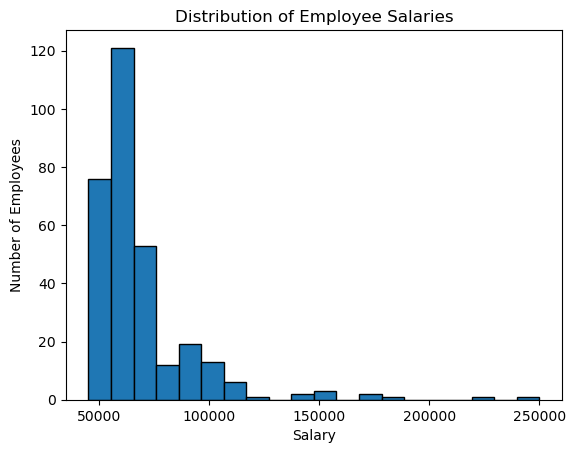

In [8]:
#Find the distribution of employee salaries
plt.hist(df['Salary'].dropna(), bins=20, edgecolor='black')
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employee Salaries")
plt.show()

In [7]:
#What is the average age of employees at the company? (Use DOB column)
df['DOB'] = pd.to_datetime(df['DOB'])

today = pd.to_datetime("today")

df['Age'] = (today - df['DOB']).dt.days // 365

average_age = df['Age'].mean()

print("Average age of employees:", round(average_age, 2))


Average age of employees: 16.85


In [10]:
#How many employees are still employed vs terminated?
status_counts = df['EmploymentStatus'].value_counts()

status_counts


EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64

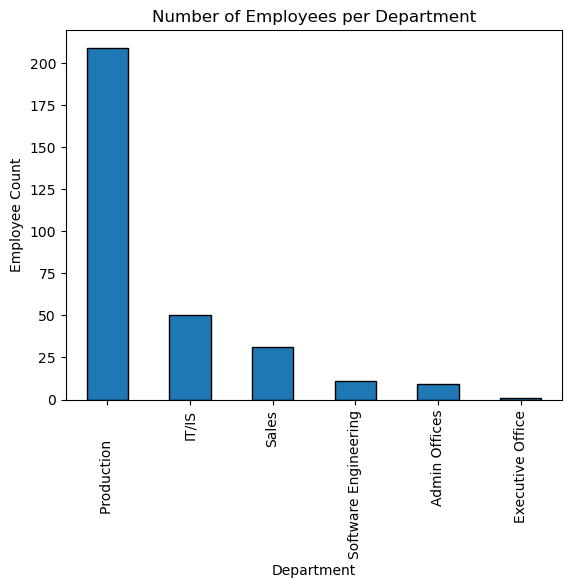

In [11]:
#Which departments have the most employees?
dept_counts = df['Department'].value_counts()
dept_counts.plot(kind='bar', edgecolor='black')
plt.title("Number of Employees per Department")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.show()

#### Part B: Business Analysis

In [12]:
#What is the average salary per department?
average_salary=df.groupby('Department')['Salary'].mean()
average_salary

Department
Admin Offices            71791.888889
Executive Office        250000.000000
IT/IS                    97064.640000
Production               59953.545455
Sales                    69061.258065
Software Engineering     94989.454545
Name: Salary, dtype: float64

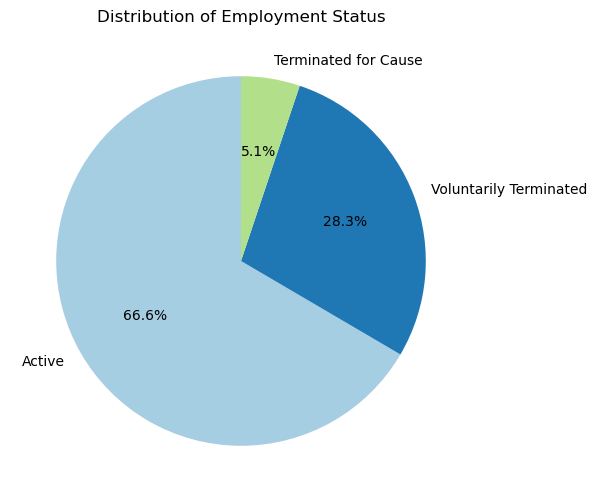

In [13]:
#Find the distribution of employment status (Active, Voluntarily Terminated, etc.).

status_counts = df['EmploymentStatus'].value_counts()

plt.figure(figsize=(6,6))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribution of Employment Status")
plt.ylabel("")
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19064\2373976158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="GenderID", y="Salary", palette="pastel")


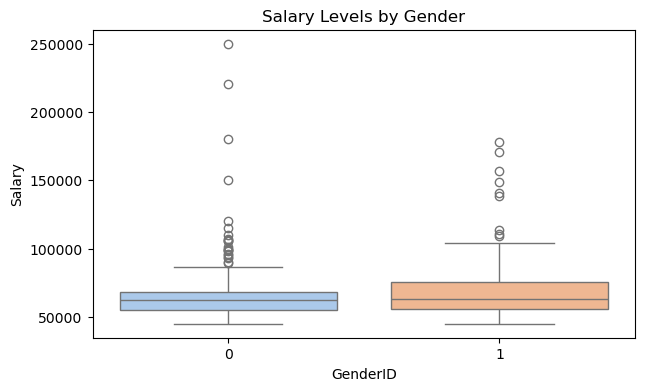

In [14]:
#Compare salary levels between Male and Female employees
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="GenderID", y="Salary", palette="pastel")

plt.title("Salary Levels by Gender")
plt.xlabel("GenderID")
plt.ylabel("Salary")
plt.show()


In [15]:
#Which recruitment source brings in the most employees?
source_most = df["RecruitmentSource"].value_counts()
source_most

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

In [16]:
#What percentage of employees attended a Diversity Job Fair?

percentage_attended = (df['RecruitmentSource'].str.contains("Diversity Job Fair", case=False).sum() / len(df)) * 100
percentage_attended

np.float64(9.32475884244373)

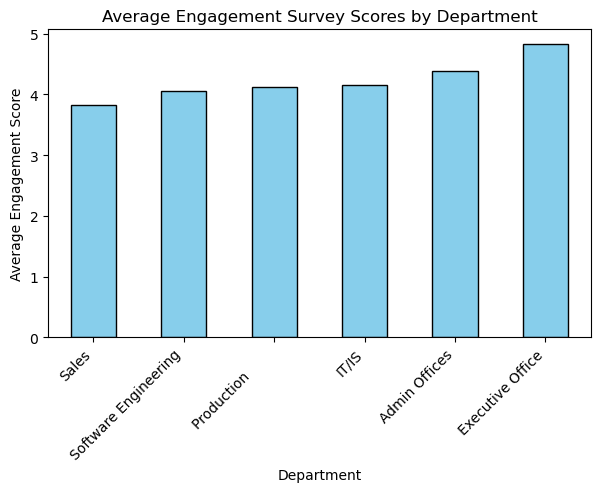

In [17]:
#Compare engagement survey scores across different departments.
dept_engagement = df.groupby("Department")["EngagementSurvey"].mean().sort_values()

plt.figure(figsize=(7,4))
dept_engagement.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Engagement Survey Scores by Department")
plt.xlabel("Department")
plt.ylabel("Average Engagement Score")
plt.xticks(rotation=45, ha="right")
plt.show()


In [18]:
# Find the race with the highest average salary
race_salary = df.groupby("RaceDesc")["Salary"].mean().sort_values(ascending=False)
race_salary


RaceDesc
Hispanic                            83667.000000
Black or African American           74431.025000
Asian                               68521.206897
White                               67287.545455
American Indian or Alaska Native    65806.000000
Two or more races                   59998.181818
Name: Salary, dtype: float64

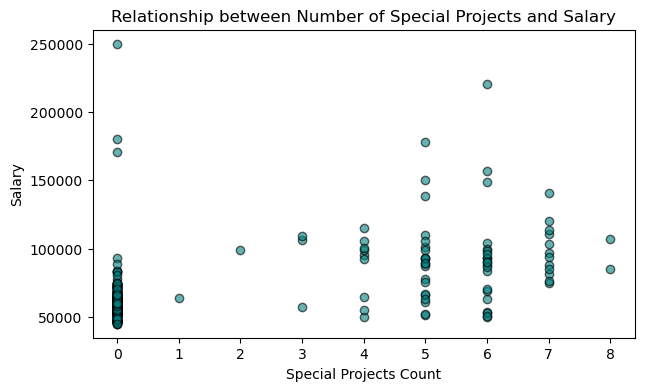

In [19]:
#What is the relationship between number of projects (SpecialProjectsCount) and salary?
plt.figure(figsize=(7,4))
plt.scatter(df["SpecialProjectsCount"], df["Salary"], alpha=0.6, color="teal", edgecolor="black")
plt.title("Relationship between Number of Special Projects and Salary")
plt.xlabel("Special Projects Count")
plt.ylabel("Salary")
plt.show()


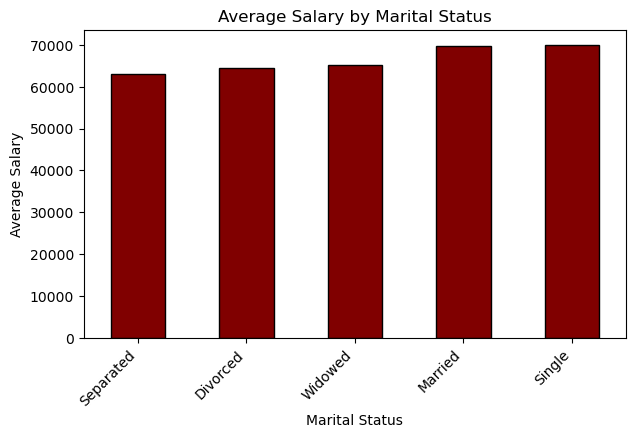

In [20]:
#Do married employees earn more on average than single employees?
sal_status= df.groupby("MaritalDesc")["Salary"].mean().sort_values()

plt.figure(figsize=(7,4))
sal_status.plot(kind="bar", color="maroon", edgecolor="black")
plt.title("Average Salary by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Salary")
plt.xticks(rotation=45, ha="right")
plt.show()


In [21]:
#Which managers have the largest teams?

manager_team_size = df['ManagerName'].value_counts().head(10)
manager_team_size


ManagerName
Michael Albert    22
Kissy Sullivan    22
Elijiah Gray      22
Kelley Spirea     22
Brannon Miller    22
David Stanley     21
Webster Butler    21
Ketsia Liebig     21
Amy Dunn          21
Janet King        19
Name: count, dtype: int64

#### Part C: Data Visualization

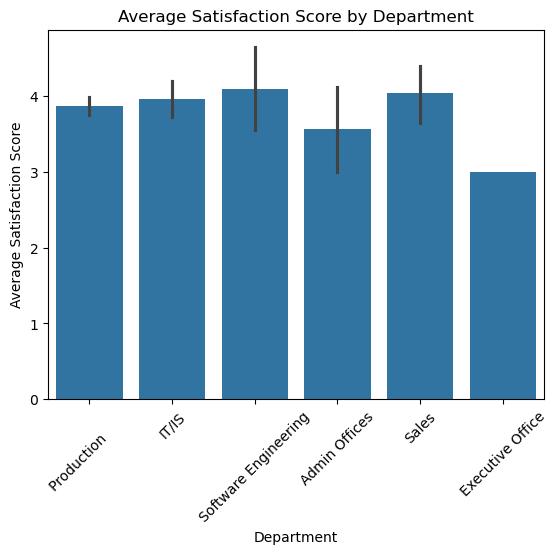

In [28]:
#Compare average satisfaction score by department.
sns.barplot(x="Department", y="EmpSatisfaction", data=df, estimator="mean")

plt.xlabel("Department")
plt.ylabel("Average Satisfaction Score")
plt.title("Average Satisfaction Score by Department")
plt.xticks(rotation=45) 
plt.show()


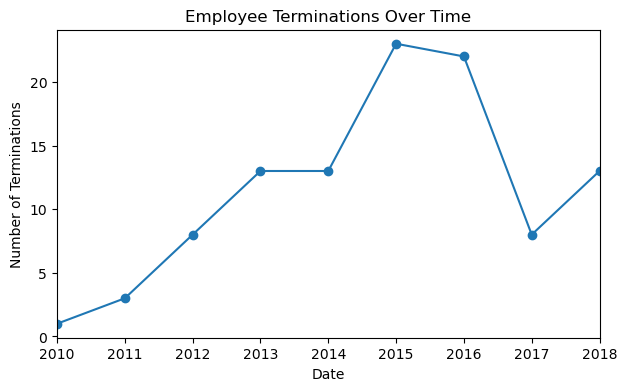

In [31]:
#Visualize employee terminations over time

df["DateofTermination"] = pd.to_datetime(df["DateofTermination"])

terminations = df["DateofTermination"].dt.to_period("Y").value_counts().sort_index()

terminations.plot(kind="line", figsize=(7,4), marker="o")
plt.title("Employee Terminations Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Terminations")
plt.show()

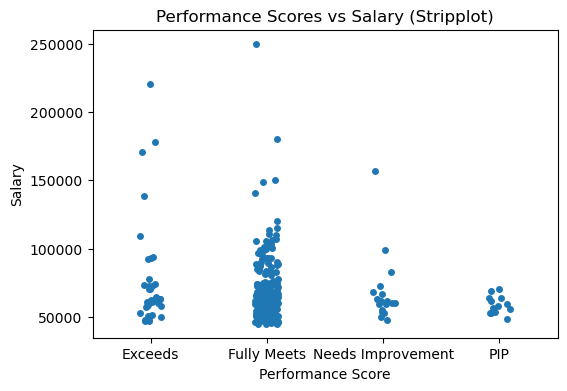

In [ ]:
#Visualize performance scores vs salary.

plt.figure(figsize=(6,4))
sns.stripplot(x="PerformanceScore", y="Salary", data=df, jitter=True)

plt.xlabel("Performance Score")
plt.ylabel("Salary")
plt.title("Performance Scores vs Salary (Stripplot)")
plt.show()

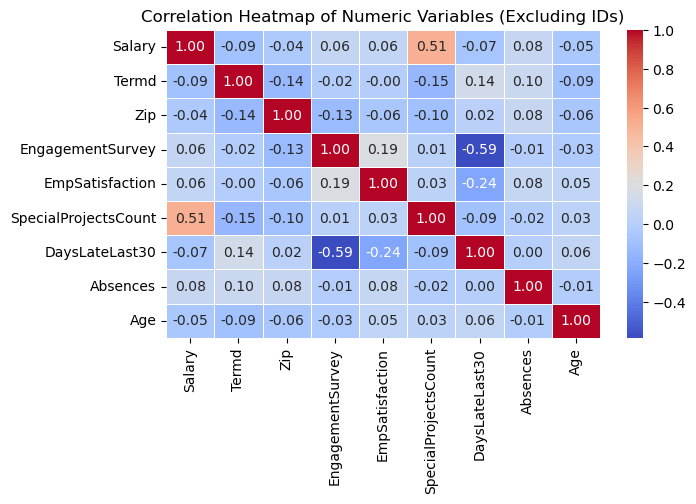

In [38]:
#Create a heatmap of correlations between numeric variables.

df_numeric = df.select_dtypes(include=["number"]).drop(columns=["EmpID", "ManagerID", "DeptID", "PerfScoreID", "PositionID","MarriedID","MaritalStatusID","GenderID","EmpStatusID","FromDiversityJobFairID"], errors="ignore")

corr_matrix = df_numeric.corr()

plt.figure(figsize=(7,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Variables (Excluding IDs)")
plt.show()


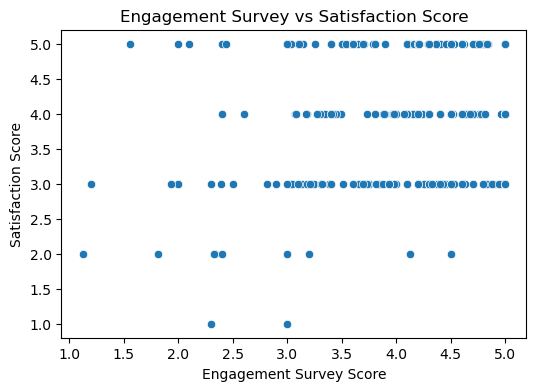

In [39]:
#Plot engagement survey score vs satisfaction score

plt.figure(figsize=(6,4))
sns.scatterplot(x="EngagementSurvey", y="EmpSatisfaction", data=df)

plt.xlabel("Engagement Survey Score")
plt.ylabel("Satisfaction Score")
plt.title("Engagement Survey vs Satisfaction Score")
plt.show()



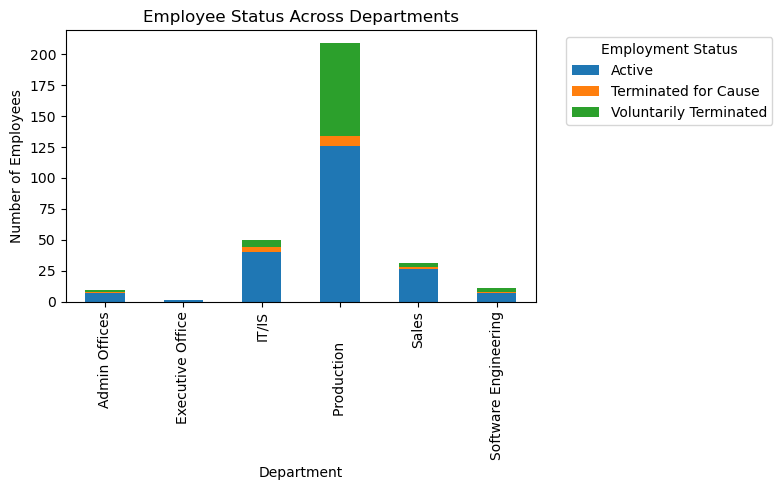

In [42]:
#Show a stacked bar chart of employee status across departments
dept_status = pd.crosstab(df['Department'], df['EmploymentStatus'])

dept_status.plot(kind="bar", stacked=True, figsize=(8,5))

plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Employee Status Across Departments")
plt.legend(title="Employment Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


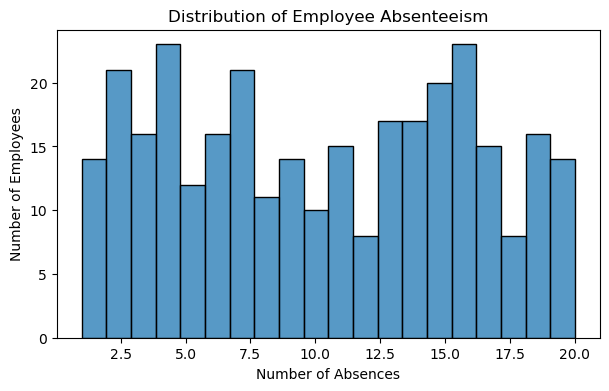

In [45]:
#Plot absenteeism (Absences) distribution among employees.
plt.figure(figsize=(7,4))
sns.histplot(df["Absences"], bins=20, kde=False)

plt.xlabel("Number of Absences")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employee Absenteeism")
plt.show()


#### Part D: PCA (Dimensionality Reduction)

In [6]:
#Standardize numerical features before applying PCA.

numeric_df = df.select_dtypes(include=["number"]).drop(columns=["EmpID", "ManagerID", "DeptID", "PerfScoreID", "PositionID"], errors="ignore")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)


In [7]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=numeric_df.columns
)
print("\nFeature Loadings:\n", loadings)


Explained variance ratio: [0.17038602 0.13658065]

Feature Loadings:
                              PC1       PC2
MarriedID               0.108248 -0.024963
MaritalStatusID         0.133815  0.123554
GenderID               -0.038965 -0.107827
EmpStatusID             0.608461  0.205312
FromDiversityJobFairID  0.174118  0.056376
Salary                 -0.226073  0.170585
Termd                   0.607359  0.167473
Zip                    -0.099510 -0.236192
EngagementSurvey       -0.116142  0.583621
EmpSatisfaction        -0.076728  0.367222
SpecialProjectsCount   -0.262649  0.136646
DaysLateLast30          0.203082 -0.561556
Absences                0.093895  0.068827


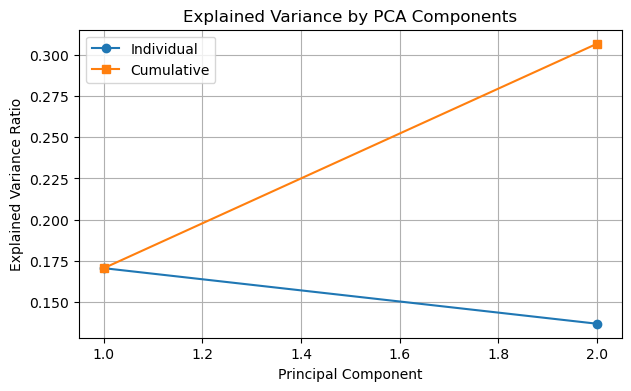

In [9]:
#Plot the explained variance ratio for the PCA components.

plt.figure(figsize=(7,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_, marker='o', label="Individual")
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='s', label="Cumulative")

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by PCA Components")
plt.legend()
plt.grid(True)
plt.show()


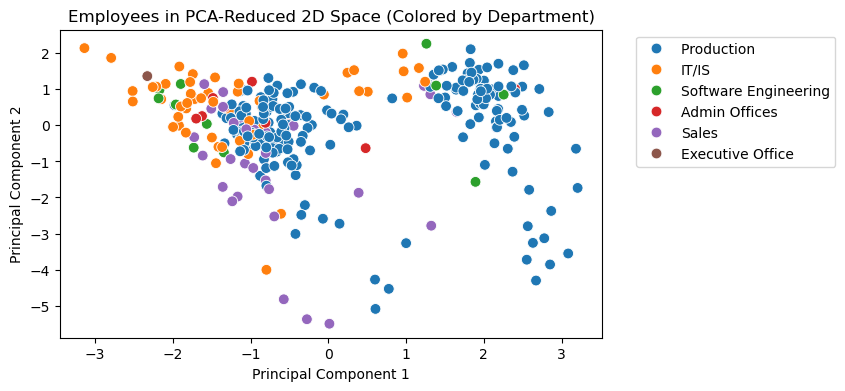

In [13]:
#Reduce the dataset to 2 dimensions with PCA and plot employees colored by department.

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Department"] = df["Department"]

plt.figure(figsize=(7,4))
sns.scatterplot(x="PC1", y="PC2", hue="Department", data=pca_df, palette="tab10", s=60)

plt.title("Employees in PCA-Reduced 2D Space (Colored by Department)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [14]:
#Which variables contribute most to the first principal component?

pc1_loadings = pd.Series(pca.components_[0], index=numeric_df.columns)

pc1_contrib = pc1_loadings.abs().sort_values(ascending=False)

print("Top contributing variables to PC1:")
print(pc1_contrib.head(10))


Top contributing variables to PC1:
EmpStatusID               0.608461
Termd                     0.607359
SpecialProjectsCount      0.262649
Salary                    0.226073
DaysLateLast30            0.203082
FromDiversityJobFairID    0.174118
MaritalStatusID           0.133815
EngagementSurvey          0.116142
MarriedID                 0.108248
Zip                       0.099510
dtype: float64


In [17]:
#Apply PCA to engagement + satisfaction + absences. Do these condense into 1 dimension?

subset = df[["EngagementSurvey", "EmpSatisfaction", "Absences"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

pca = PCA()
pca.fit(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance explained:", pca.explained_variance_ratio_.cumsum())

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2", "PC3"],
    index=subset.columns
)
print("\nLoadings:\n", loadings)


Explained variance ratio: [0.39958328 0.33535499 0.26506173]
Cumulative variance explained: [0.39958328 0.73493827 1.        ]

Loadings:
                        PC1       PC2       PC3
EngagementSurvey  0.659712 -0.371955 -0.653016
EmpSatisfaction   0.712038  0.031431  0.701437
Absences          0.240378  0.927719 -0.285581


##### PC1 explains most of the variance so these 3 features can indeed be condensed into 1 dimension.

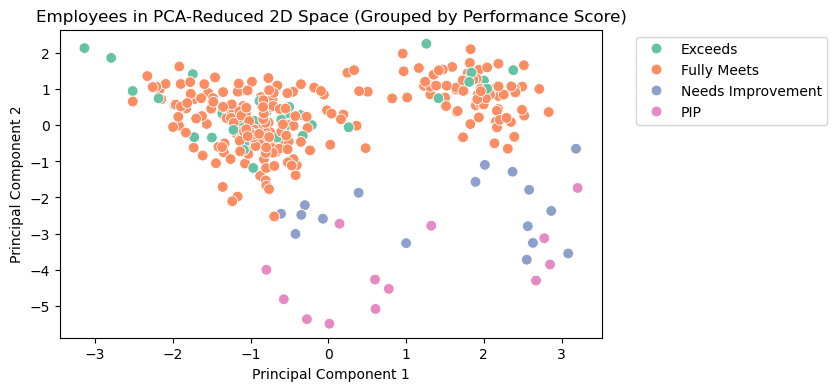

In [ ]:
#Visualize employees in PCA-reduced 2D space grouped by PerformanceScore.

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["PerformanceScore"] = df["PerformanceScore"]

plt.figure(figsize=(7,4))
sns.scatterplot(x="PC1", y="PC2", hue="PerformanceScore", 
                data=pca_df, palette="Set2", s=60)

plt.title("Employees in PCA-Reduced 2D Space (Grouped by Performance Score)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Loadings:
                        PC1       PC2
Salary            0.721163  0.019746
Absences          0.553347 -0.617837
EngagementSurvey  0.416811  0.786058


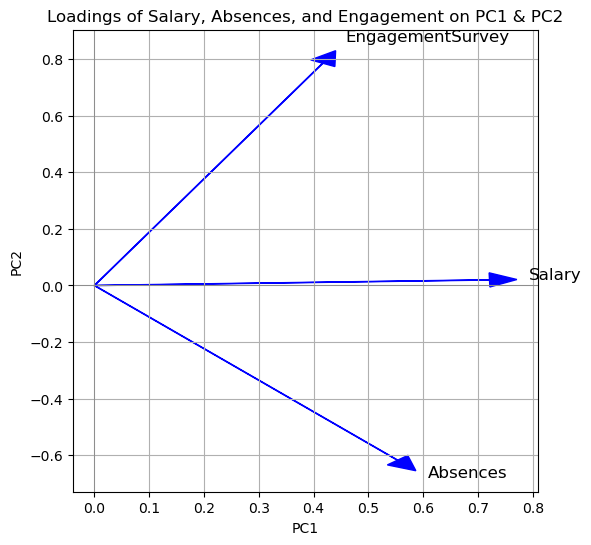

In [23]:
#Plot loadings of salary, absences, and engagement on the first 2 PCs

subset = df[["Salary", "Absences", "EngagementSurvey"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(subset)

pca = PCA(n_components=2)
pca.fit(X_scaled)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=subset.columns
)

print("Loadings:\n", loadings)

plt.figure(figsize=(6,6))
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)

for feature in loadings.index:
    plt.arrow(0, 0, 
              loadings.loc[feature, "PC1"], 
              loadings.loc[feature, "PC2"], 
              head_width=0.05, head_length=0.05, color="blue")
    plt.text(loadings.loc[feature, "PC1"]*1.1, 
             loadings.loc[feature, "PC2"]*1.1, 
             feature, fontsize=12)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Loadings of Salary, Absences, and Engagement on PC1 & PC2")
plt.grid(True)
plt.show()


#### When PCA is Appropriate in HR Analytics

##### 1.Reducing survey dimensions
##### 2.Handling multicollinearity in predictors
##### 3.Visualizing high-dimensional employee data
##### 4.Data compression for clustering/segmentation